# 1. Introduction to Naive Bayes algorithm:

In machine learning, Naive Bayes classification is a straightforward and powerful algorithm for the classification task. Naive Bayes classification is based on applying Bayes' theorem where independence between the features is assumed. Naive Bayes classification works well for textual data analysis such as Natural Language Processing task.

It is called "Naive" because we assume that the features are independent of each other. This classifier brings the power of Bayes' theorem to machine learning.

# 2. Naive Bayes algorithms intuition:

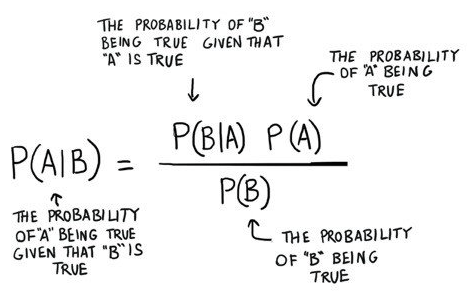

(Image taken from: https://www.educba.com/bayes-theorem/)

We will extensively use this equation in machine learning too!

## Let's consider an example of spam email classification:

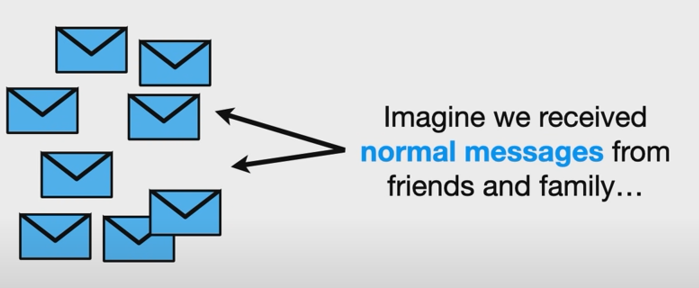

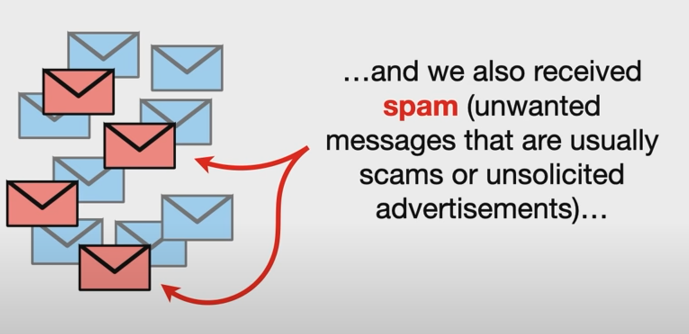

## Let's go through the steps of Naive Bayes algorithm

### 1. The algorithm creates histogram to calculate probabilities:

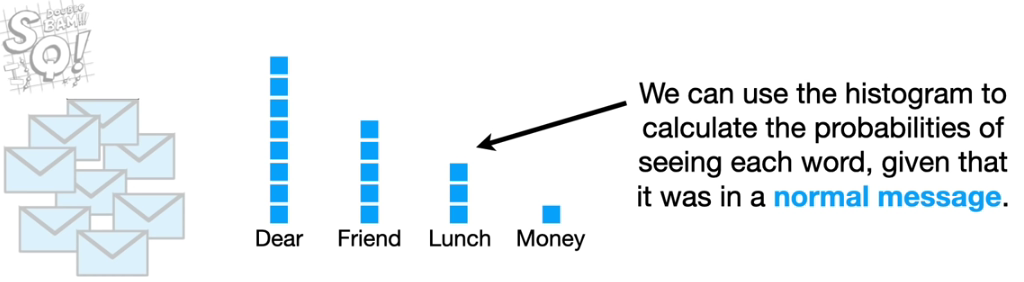

**Now create the histogram for the spam emails:**

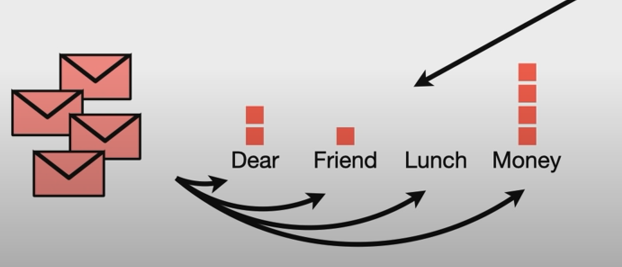

### 2. Now calculate the probabilities from the given histogram: 

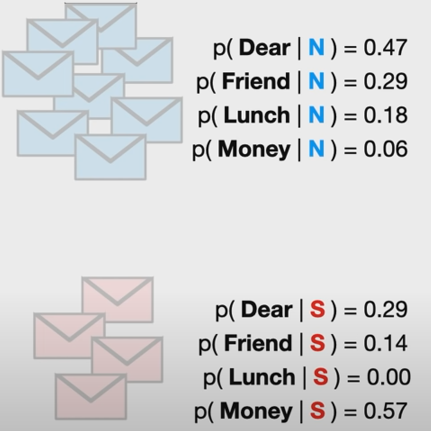

### 3. Now, classify the messages (Using bayes' theorem): 

P(N | Dear Friend) = P(N) x P(Dear | N) x P(Friend | N)

P(N) = 8/(8 + 4) because, there are 8 normal messages and 4 spam in total training set.

Similarly, P(S) = 4/(8 + 4) and P(S | Dear Friend) = P(S) x P(Dear | S) x P(Friend | S)

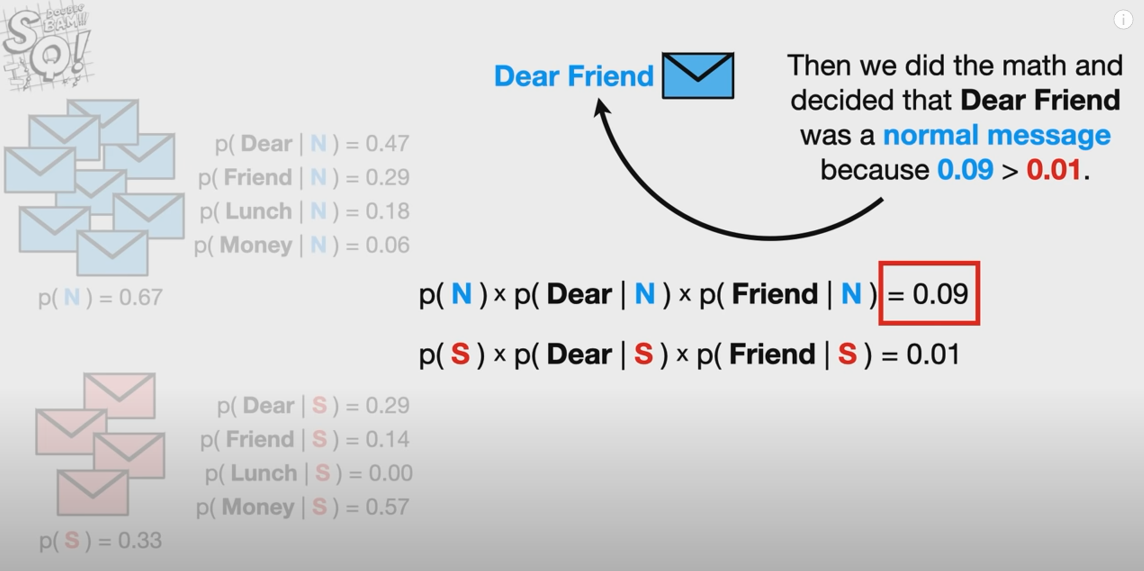

Images source: (StatQuest with Josh Starmer channel)

# Why is Naive Bayes "Naive"? 

**The thing that makes Naive Bayes so Naive is that it treats all the word orders the same.**

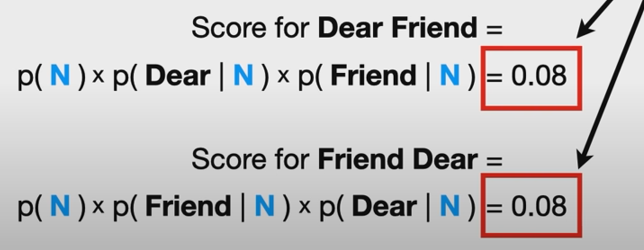

**By ignoring relationships among words, Naive Bayes has high bias and low varience. It is so because it works well in practice!**

# 3. Applications of Naive Bayes algorithm:

### a. Spam filtering
### b. Text classification
### c. Sentiment analysis
### d. Recommender systems

# 4. Types of Naive Bayes algorithm:

### a. Multinomial Naive Bayes. (The one we did)
--> It is used when we have discrete data (eg. movie ratings ranging from 1 to 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.


### b. Gaussian Naive Bayes.
--> Gaussian Naive Bayes is used in cases when all our features are continuous. It makes use of Gausian distribution formula to calculate the probabilities. 

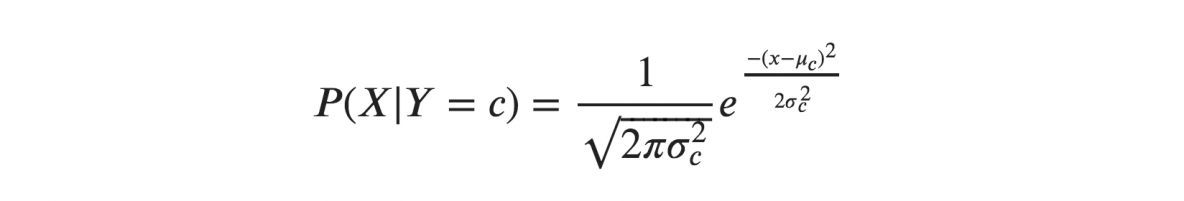

### c. Bernoulli Naive Bayes.
--> It assumes that all our features are binary such that they take only two values. Means 0s can represent "Word does not occur in the document" and 1s as "word occurs in the document".

# 5. Let's get to the coding. YAYYY!!!!!

In [1]:
# Imports:
import pandas as pd
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [3]:
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Train_test_split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size = 0.20)

### Vectorizing the texts(Similar to the above histogram):

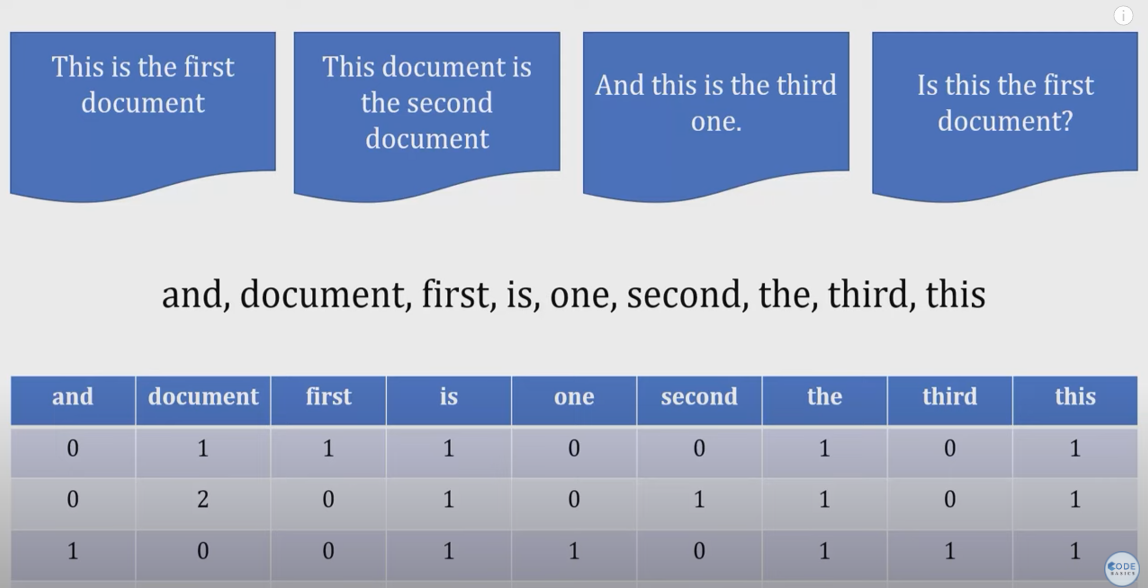

**Image Source: Code Basics channel**

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

word_vector = CountVectorizer()
X_train_count = word_vector.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using multinomial Naive Bayes algorithm:

In [7]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [8]:
emails = [
    'Hey anurag, can we go for a movie tomorrow? I know you have been busy lately, but please spend some quality time with me.',
    'BAM BAM BAM, Dear anurag, you won a lottery of 10 million dollars. Make a payment of 1000 dollars in this account and redeem your money!'
]

email_count = word_vector.transform(emails)
model.predict(email_count)

array([0, 1], dtype=int64)

### Model evaluation:

In [9]:
X_test_count = word_vector.transform(X_test)
model.score(X_test_count, y_test)

0.9856502242152466

### Making the pipeline:

In [10]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('NB', MultinomialNB())
])

In [11]:
clf.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('NB', MultinomialNB())])

In [12]:
clf.score(X_test, y_test)

0.9856502242152466

In [13]:
clf.predict(emails)

array([0, 1], dtype=int64)